In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as random
from scipy.stats import linregress
import seaborn as sns
from scipy.stats import shapiro
import plotly.express as px
from dash import Dash, dcc, html


Creating Dataframes with `pandas`
=====

In [2]:
#Finances
finance_df = pd.read_csv("resources/campus_finances.csv")
#Dropout rates
new_dropout_df = pd.read_csv("resources/21_22_dropouts.csv")
#ACT scores
act_data_df = pd.read_csv("resources/ACT_data.csv")
#SAT scores
sat_data_df = pd.read_csv("resources/SAT_data.csv")
#Campus descriptions (size)
descriptions_df = pd.read_csv("resources/campus_descriptions.csv")
# Expidenture
expidenture_df = pd.read_csv("resources/expidenture_data.csv")

SAT and ACT scores merging
====

In [3]:
#sat df clean up
sat_data_df = sat_data_df[sat_data_df["Group"] == "All Students"]
sat_data_df.drop(["Group", "Campus Number", "AI Code", "District Number", "County Number", "Unnamed: 13", "Unnamed: 14"], axis=1,inplace=True )
sat_data_df= sat_data_df.dropna()
#ACT df clean up
act_data_df= act_data_df[act_data_df["Group"] == "All Students"]
act_data_df.drop(["Group", "Campus Number", "AI Code", "District Number", "County", "Unnamed: 15"], axis=1,inplace=True )
act_data_df.dropna()



,Campus Name,District Name,County Name,Region,Region Name,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,Cayuga HS,Cayuga ISD,Anderson County,7,Kilgore,21.5,24.5,20.5,25.5,23.0
57,Elkhart HS,Elkhart ISD,Anderson County,7,Kilgore,19.0,21.5,22.5,21.5,21.0
114,Frankston HS,Frankston ISD,Anderson County,7,Kilgore,27.5,24.0,27.0,25.5,26.0
171,Palestine HS,Palestine ISD,Anderson County,7,Kilgore,20.6,21.5,22.7,22.2,22.0
285,Slocum HS,Slocum ISD,Anderson County,7,Kilgore,24.5,23.2,25.0,24.2,24.2
...,...,...,...,...,...,...,...,...,...,...
88179,Newcastle School,Newcastle ISD,Young County,9,Wichita Falls,17.6,19.8,17.8,17.7,18.2
88236,Olney HS,Olney ISD,Young County,9,Wichita Falls,17.7,19.8,19.0,20.0,19.3
88293,Zapata HS,Zapata County ISD,Zapata County,1,Edinburg,15.2,16.3,18.5,17.8,17.0
88350,Crystal City HS,Crystal City ISD,Zavala County,20,San Antonio,14.1,15.1,17.4,15.3,15.7


In [4]:
#Merging SAT and ACT on district 
act_sat_df = pd.merge(sat_data_df, act_data_df, how="left", on=["Campus Name", "District Name", "County Name", "Region", "Region Name"])
act_sat_df

,Campus Name,District Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,Cayuga HS,Cayuga ISD,Anderson County,7,Kilgore,513.0,496.0,1009.0,21.5,24.5,20.5,25.5,23.0
1,Elkhart HS,Elkhart ISD,Anderson County,7,Kilgore,514.0,507.0,1021.0,19.0,21.5,22.5,21.5,21.0
2,Frankston HS,Frankston ISD,Anderson County,7,Kilgore,511.0,505.0,1016.0,27.5,24.0,27.0,25.5,26.0
3,Neches HS,Neches ISD,Anderson County,7,Kilgore,565.0,532.0,1097.0,NaN,NaN,NaN,NaN,NaN
4,Palestine HS,Palestine ISD,Anderson County,7,Kilgore,544.0,541.0,1085.0,20.6,21.5,22.7,22.2,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,Alba-Golden HS,Alba-Golden ISD,Wood County,7,Kilgore,675.0,645.0,1320.0,19.9,20.4,21.4,21.6,20.9
1570,Denver City HS,Denver City ISD,Yoakum County,17,Lubbock,494.0,476.0,970.0,19.8,20.2,20.2,19.8,20.0
1571,Graham HS,Graham ISD,Young County,9,Wichita Falls,563.0,538.0,1101.0,18.9,20.8,21.5,21.6,20.8
1572,Olney HS,Olney ISD,Young County,9,Wichita Falls,508.0,536.0,1044.0,17.7,19.8,19.0,20.0,19.3


# Finance

In [5]:
finance_df= finance_df[finance_df["YEAR"] == 2022]


In [6]:
#Cleaning finance_df
district_name=finance_df.loc[:,"District Name"]
total_revenue=finance_df.loc[:,"ALL FUNDS-TOTAL OPERATING REVENUE"]
student_count=finance_df.loc[:,"FALL SURVEY ENROLLMENT"]
year=finance_df.loc[:,"YEAR"]

clean_finance_df  =pd.DataFrame ({
    "District Name": district_name,
    "Year": year,
    "Total Operating Revenue": total_revenue,
    "Student Count": student_count,
   
})


In [7]:
#For merging all_student_scores with clean_finance we need ""District Name in the same format"

clean_finance_low = pd.DataFrame(clean_finance_df)

# Transform the "District Name" column to lowercase
clean_finance_low["District Name"] = clean_finance_low["District Name"].str.lower()


In [8]:
act_sat_low = pd.DataFrame(act_sat_df)

# Change "District Name" column to lowercase
act_sat_low["District Name"] = act_sat_low["District Name"].str.lower()

act_sat_low 

,Campus Name,District Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,Cayuga HS,cayuga isd,Anderson County,7,Kilgore,513.0,496.0,1009.0,21.5,24.5,20.5,25.5,23.0
1,Elkhart HS,elkhart isd,Anderson County,7,Kilgore,514.0,507.0,1021.0,19.0,21.5,22.5,21.5,21.0
2,Frankston HS,frankston isd,Anderson County,7,Kilgore,511.0,505.0,1016.0,27.5,24.0,27.0,25.5,26.0
3,Neches HS,neches isd,Anderson County,7,Kilgore,565.0,532.0,1097.0,NaN,NaN,NaN,NaN,NaN
4,Palestine HS,palestine isd,Anderson County,7,Kilgore,544.0,541.0,1085.0,20.6,21.5,22.7,22.2,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,Alba-Golden HS,alba-golden isd,Wood County,7,Kilgore,675.0,645.0,1320.0,19.9,20.4,21.4,21.6,20.9
1570,Denver City HS,denver city isd,Yoakum County,17,Lubbock,494.0,476.0,970.0,19.8,20.2,20.2,19.8,20.0
1571,Graham HS,graham isd,Young County,9,Wichita Falls,563.0,538.0,1101.0,18.9,20.8,21.5,21.6,20.8
1572,Olney HS,olney isd,Young County,9,Wichita Falls,508.0,536.0,1044.0,17.7,19.8,19.0,20.0,19.3


# Merging score and finances

In [9]:
#Merging score and finance 
score_finance_df = pd.merge(clean_finance_low, act_sat_low, how="left", on=["District Name"] )
score_finance_complete = score_finance_df.dropna()

In [10]:
score_finance_complete.loc[:,"Student Count"] = score_finance_complete["Student Count"].str.replace(",","").astype(int)


In [11]:
score_finance_complete.loc[:,"Total Operating Revenue"] = score_finance_complete["Total Operating Revenue"].str.replace('[$,]', '', regex=True).astype(float)

In [12]:
sort_score_finance_complete = score_finance_complete.sort_values("Student Count", ascending= False).reset_index().drop(labels="index", axis=1)
sort_score_finance_complete.head()

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
0,houston isd,2022,2535319349.0,193727,DeBakey HS for Health Prof,Harris County,4.0,Houston,631.0,645.0,1275.0,27.9,27.9,27.1,26.5,27.5
1,houston isd,2022,2535319349.0,193727,South ECHS,Harris County,4.0,Houston,496.0,481.0,977.0,15.6,15.0,18.7,15.9,16.3
2,houston isd,2022,2535319349.0,193727,Bellaire HS,Harris County,4.0,Houston,574.0,563.0,1137.0,26.5,25.8,27.4,26.1,26.6
3,houston isd,2022,2535319349.0,193727,Furr HS,Harris County,4.0,Houston,418.0,405.0,824.0,15.7,16.0,17.0,18.0,17.0
4,houston isd,2022,2535319349.0,193727,Jones Futures Academy,Harris County,4.0,Houston,458.0,453.0,911.0,17.8,19.8,22.3,22.5,20.8


# Merging drop out rates and school type

In [13]:
#clean drop out df
new_dropout_df.drop(labels= ["Unnamed: 9", "Unnamed: 10","Unnamed: 11", "Unnamed: 12"], axis=1,inplace=True)
new_dropout_df.dropna()

,Campus Number,Campus Name,District Number,District Name,County Number,County Name,Student Count,Dropout Count,Dropout Rate
0,1902001,Cayuga HS,1902,Cayuga ISD,1,Anderson County,173,0,0.0
1,1902001,Cayuga HS,1902,Cayuga ISD,1,Anderson County,173,0,0.0
2,1902001,Cayuga HS,1902,Cayuga ISD,1,Anderson County,173,0,0.0
3,1902001,Cayuga HS,1902,Cayuga ISD,1,Anderson County,173,0,0.0
4,1902041,Cayuga Middle,1902,Cayuga ISD,1,Anderson County,116,0,0.0
...,...,...,...,...,...,...,...,...,...
18472,254902001,La Pryor HS,254902,La Pryor ISD,254,Zavala County,216,4,1.9
18473,254902001,La Pryor HS,254902,La Pryor ISD,254,Zavala County,80,1,1.3
18474,254902001,La Pryor HS,254902,La Pryor ISD,254,Zavala County,80,1,1.3
18475,254902001,La Pryor HS,254902,La Pryor ISD,254,Zavala County,137,3,2.2


In [14]:
new_dropout_df.drop_duplicates(subset=["Campus Number"], keep="last", inplace=True, ignore_index=True)

In [15]:
#merge school discriptions and dropouts
hodgepodge_df = pd.merge(descriptions_df, new_dropout_df, how = "right", on=["Campus Number"])
hodgepodge_df.loc[:, "District Name"] = hodgepodge_df["District Name"].str.lower()

#make dropout rate numeric to convert to float
hodgepodge_df.loc[:, "Dropout Rate"] = pd.to_numeric(hodgepodge_df["Dropout Rate"], errors="coerce")
hodgepodge_df.loc[:, "Student Count"] = pd.to_numeric(hodgepodge_df["Student Count"], errors="coerce")

#make dropout rate a float for use in visualizations
hodgepodge_df.loc[:, "Dropout Rate"] = hodgepodge_df["Dropout Rate"].astype(float)

#remove duplicate rows from data to compress dataframe
hodgepodge_df.drop_duplicates(subset=["Campus Number"], keep="last", inplace=True, ignore_index=True)

hodgepodge_df

,Campus Name_x,Campus Number,Campus Type,Campus Type Description,Campus Name_y,District Number,District Name,County Number,County Name,Student Count,Dropout Count,Dropout Rate
0,CAYUGA H S,1902001,43.0,43-Rural: Remote,Cayuga HS,1902,cayuga isd,1,Anderson County,173.0,0,0.0
1,CAYUGA MIDDLE,1902041,43.0,43-Rural: Remote,Cayuga Middle,1902,cayuga isd,1,Anderson County,116.0,0,0.0
2,ELKHART H S,1903001,42.0,42-Rural: Distant,Elkhart HS,1903,elkhart isd,1,Anderson County,334.0,0,0.0
3,ELKHART MIDDLE,1903041,42.0,42-Rural: Distant,Elkhart Middle,1903,elkhart isd,1,Anderson County,209.0,0,0.0
4,FRANKSTON H S,1904001,42.0,42-Rural: Distant,Frankston HS,1904,frankston isd,1,Anderson County,248.0,2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...
4189,ZAPATA H S,253901001,41.0,41-Rural: Fringe,Zapata HS,253901,zapata county isd,253,Zapata County,NaN,18,1.8
4190,ZAPATA MIDDLE,253901041,33.0,33-Town: Remote,Zapata Middle,253901,zapata county isd,253,Zapata County,579.0,2,0.3
4191,CRYSTAL CITY H S,254901001,33.0,33-Town: Remote,Crystal City HS,254901,crystal city isd,254,Zavala County,540.0,21,3.9
4192,STERLING H FLY JR H S,254901042,33.0,33-Town: Remote,Sterling H Fly JH,254901,crystal city isd,254,Zavala County,287.0,5,1.7


# Sortind Data Frames for Stats data and Graphs

In [16]:
# no duplicate ISD
finance_no_dup_isd=sort_score_finance_complete.drop_duplicates(subset='District Name')


In [17]:
sort_score_finance_complete["per student budget"] = sort_score_finance_complete['Total Operating Revenue']/sort_score_finance_complete['Student Count']


In [18]:
sort_score_finance_complete.loc[:,"per student budget"] = sort_score_finance_complete["per student budget"].replace(".","").astype(int)


In [19]:
sort_score_finance_complete.sort_values("per student budget", ascending= False)

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos,per student budget
1132,wink-loving isd,2022,20782236.0,407,Wink HS,Winkler County,18.0,Midland,433.0,430.0,863.0,15.8,17.1,17.6,17.0,17.1,51062
1206,blackwell cisd,2022,7790469.0,155,Blackwell School,Nolan County,14.0,Abilene,635.0,625.0,1260.0,17.7,20.4,20.8,21.2,20.3,50261
1202,boys ranch isd,2022,7696618.0,178,Boys Ranch HS,Oldham County,16.0,Amarillo,524.0,482.0,1006.0,18.3,19.6,21.3,19.9,19.9,43239
1214,benjamin isd,2022,5134623.0,133,Benjamin School,Knox County,9.0,Wichita Falls,527.0,523.0,1050.0,20.2,21.7,20.5,19.2,20.7,38606
1149,rankin isd,2022,11853856.0,312,Rankin School,Upton County,18.0,Midland,419.0,422.0,841.0,13.0,14.6,14.8,16.4,15.0,37993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,wylie isd,2022,48433114.0,5097,Wylie HS,Taylor County,14.0,Abilene,582.0,560.0,1142.0,21.9,22.3,24.9,23.2,23.2,9502
627,wylie isd,2022,48433114.0,5097,Wylie East HS,Collin County,10.0,Richardson,528.0,530.0,1058.0,23.9,23.1,25.8,23.9,24.2,9502
872,leadership prep school,2022,12471077.0,1344,Leadership Prep School Secondary,Denton County,10.0,Richardson,553.0,538.0,1091.0,24.8,22.3,25.6,23.9,24.4,9279
829,denver city isd,2022,14494234.0,1596,Denver City HS,Yoakum County,17.0,Lubbock,494.0,476.0,970.0,19.8,20.2,20.2,19.8,20.0,9081


In [20]:
#bins a labels for operating revenue
spending_bins = [0, 10000, 20000, 30000, 40000, 50000, 60000]
labels = ["<$10,000", "$10,000-20,000", "$20,000-30,000", "$30,000-40,000", "$40,000-50,000", "$50,000-60,000"]

In [21]:
#df for operating revenue bins
school_spending_df = sort_score_finance_complete.copy()
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df["per student budget"],
                                                            spending_bins, labels=labels, include_lowest=True)


In [22]:
#  Calculate averages for the desired columns. 
spending_sat_total = school_spending_df.groupby(["Spending Ranges (Per Student)"])["SAT Total"].mean()
spending_act_compos = school_spending_df.groupby(["Spending Ranges (Per Student)"])["ACT Compos"].mean()

C:\Users\riahk\AppData\Local\Temp\ipykernel_23612\371008484.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_sat_total = school_spending_df.groupby(["Spending Ranges (Per Student)"])["SAT Total"].mean()
C:\Users\riahk\AppData\Local\Temp\ipykernel_23612\371008484.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spending_act_compos = school_spending_df.groupby(["Spending Ranges (Per Student)"])["ACT Compos"].mean()


In [23]:
# spending df summary
spending_summary = pd.DataFrame({
    "average total SAT score": spending_sat_total,
    "average act compos": spending_act_compos,
})

In [24]:
# Define the bin edges for school size
size_bins = [0, 500, 1000, 5000, 10000, 50000, 100000, 200000]

# Create labels for the bins
labels = ['<500', '501-1000', '1001-5000', '5001-10000', '10001-50000', '50001-100000', '100001-200000']

In [25]:
#school size df
school_size_df = sort_score_finance_complete.copy()
school_size_df["school size"] = pd.cut(school_size_df["Student Count"],
                                                            size_bins, labels=labels, include_lowest=True)


In [26]:
# average sat and act by school size

size_sat_total = school_size_df.groupby(["school size"])["SAT Total"].mean()
size_act_compos = school_size_df.groupby(["school size"])["ACT Compos"].mean()

C:\Users\riahk\AppData\Local\Temp\ipykernel_23612\1835395828.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_sat_total = school_size_df.groupby(["school size"])["SAT Total"].mean()
C:\Users\riahk\AppData\Local\Temp\ipykernel_23612\1835395828.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_act_compos = school_size_df.groupby(["school size"])["ACT Compos"].mean()


In [27]:
#schools based on size
student_count_top_bottom = ['houston isd', 'dallas isd', 'cypress-fairbanks isd', 'northside isd', 'katy isd',
                  'cherokee isd','priddy isd','richland springs isd	', 'southland isd','marathon isd'] 

big_city_schools = ['san antonio isd', 'austin isd', 'fort worth isd' , 'dallas isd', 'houston isd']
   
# selecting rows based on condition 
student_number_topbottom_5 = score_finance_complete[(score_finance_complete['District Name']).isin(student_count_top_bottom)] 
big_city_school_df =  score_finance_complete[(score_finance_complete["District Name"]).isin(big_city_schools)]

big_city_school_df.head()

,District Name,Year,Total Operating Revenue,Student Count,Campus Name,County Name,Region,Region Name,ERW,SAT Math,SAT Total,ACT English,ACT Math,ACT Reading,ACT Science,ACT Compos
107,san antonio isd,2022,676023494.0,44568,Brackenridge HS,Bexar County,20.0,San Antonio,437.0,424.0,860.0,13.7,15.4,15.6,16.1,15.3
108,san antonio isd,2022,676023494.0,44568,Burbank HS,Bexar County,20.0,San Antonio,430.0,418.0,848.0,13.7,15.8,15.7,16.2,15.4
109,san antonio isd,2022,676023494.0,44568,Edison HS,Bexar County,20.0,San Antonio,436.0,429.0,865.0,13.4,15.4,15.3,15.7,15.1
110,san antonio isd,2022,676023494.0,44568,Fox Technical HS,Bexar County,20.0,San Antonio,468.0,447.0,915.0,15.1,16.5,16.8,17.2,16.5
111,san antonio isd,2022,676023494.0,44568,Highlands HS,Bexar County,20.0,San Antonio,432.0,413.0,845.0,12.7,14.4,14.4,15.0,14.3


# Stats from data

In [28]:
#Statistical Data for Total Operating Revenue
mean_budget = finance_no_dup_isd['Total Operating Revenue'].mean()
median_budget = finance_no_dup_isd['Total Operating Revenue'].median()
std_budget = finance_no_dup_isd['Total Operating Revenue'].std()
sem_budget = finance_no_dup_isd['Total Operating Revenue'].sem()
max_budget = finance_no_dup_isd['Total Operating Revenue'].max()
min_budget = finance_no_dup_isd['Total Operating Revenue'].min()

# format
mean_formatted = "{:,.0f}".format(mean_budget)
median_formatted = "{:,.0f}".format(median_budget)
std_formatted = "{:,.0f}".format(std_budget)
sem_formatted = "{:,.0f}".format(sem_budget)
# print
print(f"Mean Total Operating Revenue: {mean_formatted}")
print(f"Median Total Operating Revenue: {median_formatted}")
print(f"Standard Deviation: {std_formatted}")
print(f"Standard Error of the Mean: {sem_formatted}")
print(f"The ISD with the largest Total Operating Revenue: {max_budget}")
print(f"The ISD with the smallest Total Operating Revenue: {min_budget}")

Mean Total Operating Revenue: 85,389,382
Median Total Operating Revenue: 22,696,266
Standard Deviation: 190,478,406
Standard Error of the Mean: 7,049,922
The ISD with the largest Total Operating Revenue: 2535319349.0
The ISD with the smallest Total Operating Revenue: 1728456.0


In [29]:
#Total Revenue distribution
statistic, p_value = shapiro(finance_no_dup_isd['Total Operating Revenue'])

# Set significance level (alpha)
alpha = 0.05

# Print the results
print("Shapiro-Wilk Normality Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the null hypothesis
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")

Shapiro-Wilk Normality Test:
Test Statistic: 0.4248087406158447
P-value: 4.7223758247746335e-43
The data does not follow a normal distribution (reject the null hypothesis).


In [30]:
#student count distribution
statistic, p_value = shapiro(finance_no_dup_isd['Student Count'])

# Set significance level (alpha)
alpha = 0.05

# Print the results
print("Shapiro-Wilk Normality Test:")
print(f"Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# Check the null hypothesis
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject the null hypothesis).")
else:
    print("The data does not follow a normal distribution (reject the null hypothesis).")

Shapiro-Wilk Normality Test:
Test Statistic: 0.4364619851112366
P-value: 9.388699710976274e-43
The data does not follow a normal distribution (reject the null hypothesis).


In [31]:
#IQR and outliers of total operating revenue 
budget = finance_no_dup_isd["Total Operating Revenue"]
quartiles = budget.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


In [32]:
print(f"The lower quartile of the total operating revenue is: {lowerq}")
print(f"The upper quartile of the total operating revenue is: {upperq}")
print(f"The interquartile range of the total operating revenue is: {iqr}")
print(f"The median of the total operating revenue is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the total operating revenue is: 11395018.75
The upper quartile of the total operating revenue is: 68576095.75
The interquartile range of the total operating revenue is: 57181077.0
The median of the total operating revenue is: 22696266.0 
Values below -74376596.75 could be outliers.
Values above 154347711.25 could be outliers.


In [33]:
#Statistical Data for Student count
mean_student = finance_no_dup_isd['Student Count'].mean()
median_student = finance_no_dup_isd['Student Count'].median()
std_student = finance_no_dup_isd['Student Count'].std()
sem_student = finance_no_dup_isd['Student Count'].sem()
max_student = finance_no_dup_isd['Student Count'].max()
min_student = finance_no_dup_isd['Student Count'].min()

# format
mean_formatted = "{:,.0f}".format(mean_budget)
median_formatted = "{:,.0f}".format(median_budget)
std_formatted = "{:,.0f}".format(std_budget)
sem_formatted = "{:,.0f}".format(sem_budget)
# print
print(f"Mean Student Count: {mean_formatted}")
print(f"Median Student Count: {median_formatted}")
print(f"Standard Deviation: {std_formatted}")
print(f"Standard Error of the Mean: {sem_formatted}")
print(f"The ISD with the highest student count has: {max_student}")
print(f"The ISD with the lowest student count has: {min_student}")

Mean Student Count: 85,389,382
Median Student Count: 22,696,266
Standard Deviation: 190,478,406
Standard Error of the Mean: 7,049,922
The ISD with the highest student count has: 193727
The ISD with the lowest student count has: 57


In [34]:
#IQR and outliers of student count 
budget = finance_no_dup_isd["Student Count"]
quartiles = budget.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

In [35]:
print(f"The lower quartile of the Student Count  is: {lowerq}")
print(f"The upper quartile of the Student Count is: {upperq}")
print(f"The interquartile range of the Student Count is: {iqr}")
print(f"The median of the Student Count is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of the Student Count  is: 755.0
The upper quartile of the Student Count is: 5286.5
The interquartile range of the Student Count is: 4531.5
The median of the Student Count is: 1687.0 
Values below -6042.25 could be outliers.
Values above 12083.75 could be outliers.


In [36]:
#ACT sats info
quartiles = score_finance_complete["ACT Compos"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of ACT composite scores for all schools is: {lowerq}")
print(f"The upper quartile of ACT composite scores for all schools is: {upperq}")
print(f"The interquartile range of ACT composite scores for all schools is: {iqr}")
print(f"The the median of ACT composite scores for all schools is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of ACT composite scores for all schools is: 18.0
The upper quartile of ACT composite scores for all schools is: 22.7
The interquartile range of ACT composite scores for all schools is: 4.699999999999999
The the median of ACT composite scores for all schools is: 20.3 
Values below 10.950000000000001 could be outliers.
Values above 29.75 could be outliers.


In [37]:
#Sat sats info
quartiles = score_finance_complete["SAT Total"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of SAT total scores for all schools is: {lowerq}")
print(f"The upper quartile of SAT total scores for all schools is: {upperq}")
print(f"The interquartile range of SAT total scores for all schools is: {iqr}")
print(f"The the median of SAT total scores for all schools is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of SAT total scores for all schools is: 934.0
The upper quartile of SAT total scores for all schools is: 1068.5
The interquartile range of SAT total scores for all schools is: 134.5
The the median of SAT total scores for all schools is: 999.0 
Values below 732.25 could be outliers.
Values above 1270.25 could be outliers.


# Graphs

In [38]:
#school size summary df
size_summary = pd.DataFrame({
    "average total SAT score": size_sat_total,
    "average act compos": size_act_compos
})

In [39]:
#school size df
sort_score_finance_complete["school size"] = pd.cut(sort_score_finance_complete["Student Count"],
                                           size_bins, labels=labels,
                                           include_lowest=True)

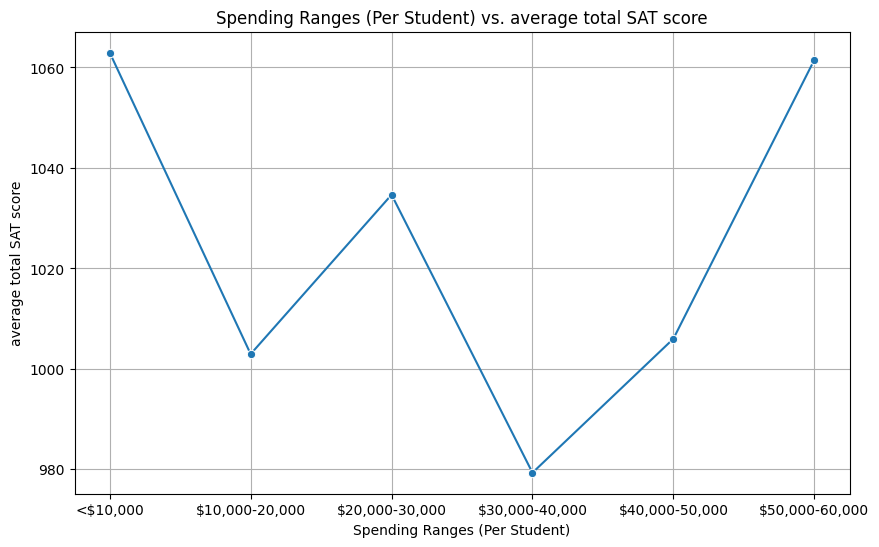

In [40]:
#Spending vs sat total 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Spending Ranges (Per Student)', y='average total SAT score', data=spending_summary, marker='o')

# Set plot labels and title
plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('average total SAT score')
plt.title('Spending Ranges (Per Student) vs. average total SAT score')
plt.grid(True)
# save
plt.savefig("images/spendingvsat.png")
# Show the plot
plt.show()

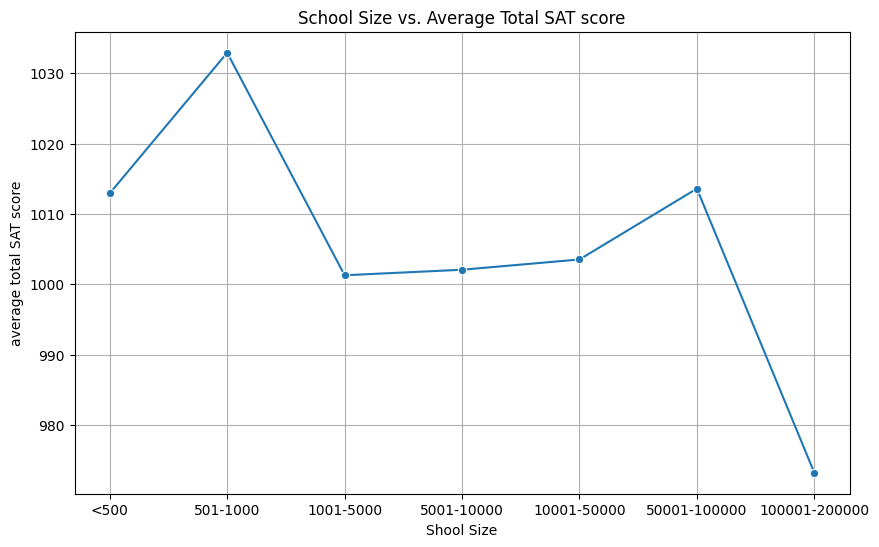

In [41]:
#school size vs sat 
plt.figure(figsize=(10, 6))
sns.lineplot(x='school size', y='average total SAT score', data=size_summary, marker='o')

# Set plot labels and title
plt.xlabel('Shool Size')
plt.ylabel('average total SAT score')
plt.title('School Size vs. Average Total SAT score')
plt.grid(True)
# save
plt.savefig("images/sizevsat.png")
# Show the plot
plt.show()

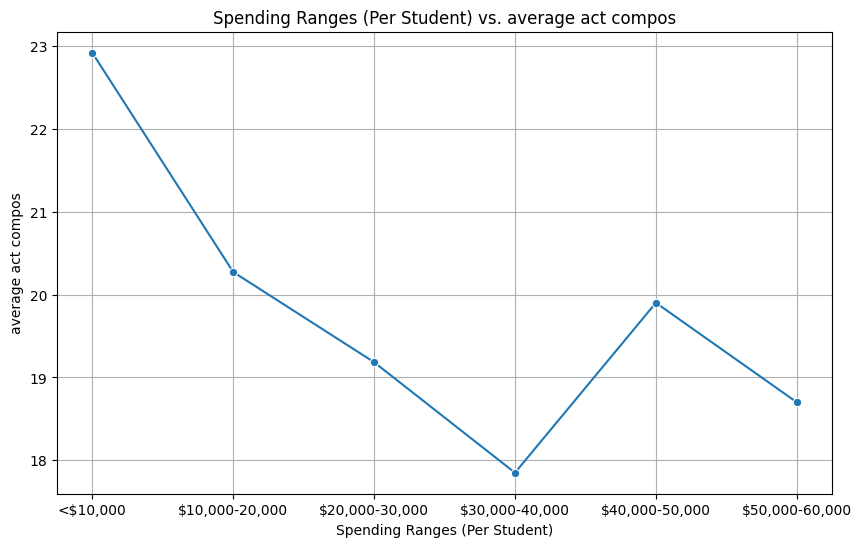

In [42]:
# spending vs act
plt.figure(figsize=(10, 6))
sns.lineplot(x='Spending Ranges (Per Student)', y='average act compos', data=spending_summary, marker='o')

# Set plot labels and title
plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('average act compos')
plt.title('Spending Ranges (Per Student) vs. average act compos')
plt.grid(True)
# save
plt.savefig("images/spendingvact.png")

# Show the plot
plt.show()

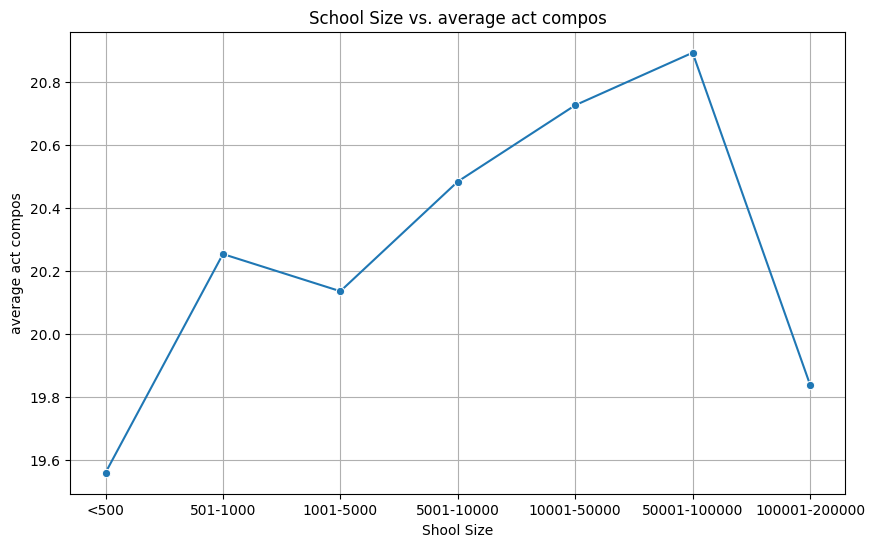

In [43]:
#school size vs act
plt.figure(figsize=(10, 6))
sns.lineplot(x='school size', y='average act compos', data=size_summary, marker='o')

# Set plot labels and title
plt.xlabel('Shool Size')
plt.ylabel('average act compos')
plt.title('School Size vs. average act compos')
plt.grid(True)
# save
plt.savefig("images/sizevact.png")
# Show the plot
plt.show()

In [44]:
#budget vs student count scatter
stu_num_budget = px.scatter(score_finance_complete, y="Student Count", x="Total Operating Revenue", hover_name="District Name", color="District Name")
stu_num_budget.show()
plt.savefig("images/torvstudent.png")

<Figure size 640x480 with 0 Axes>

In [45]:
#Big city vs student count
big_city_budget = px.scatter(big_city_school_df, y="Student Count", x="Total Operating Revenue", hover_name="District Name", color="District Name")
big_city_budget.show()
plt.savefig("images/bigcityvstudent.png")

<Figure size 640x480 with 0 Axes>

In [46]:
# total city
city_sat_budget = px.scatter(big_city_school_df, x="ACT Compos", y="SAT Total", hover_name="Campus Name", color="Campus Name")
city_sat_budget.show()

plt.savefig("images/cityvactsat.png")

<Figure size 640x480 with 0 Axes>

In [47]:
#tree map for all
all_fig = px.treemap(score_finance_complete, path=[px.Constant("all"), 'District Name', 'Campus Name'], values='SAT Total')

all_fig.update_traces(root_color="lightgrey")
all_fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
all_fig.show()
plt.savefig("images/citytree.png")

<Figure size 640x480 with 0 Axes>

In [48]:
#tree map by student count
fig = px.treemap(student_number_topbottom_5, path=[px.Constant("all"), 'District Name', 'Campus Name'], values='SAT Total')

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
plt.savefig("images/bigcitytree.png")

<Figure size 640x480 with 0 Axes>

In [49]:
#tree map by sat scores
city_fig = px.treemap(big_city_school_df, path=[px.Constant("all"), 'District Name', 'Campus Name'], values='SAT Total')

city_fig.update_traces(root_color="lightgrey")
city_fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
city_fig.show()
plt.savefig("images/treesat.png")

<Figure size 640x480 with 0 Axes>

In [50]:
#student count vs drop out rate per school type
figj1 = px.histogram(hodgepodge_df, x = "Student Count", y = "Dropout Rate", color= "Campus Type Description", histfunc="avg")
figj1.show()

In [51]:
#save as html
app = Dash()
app.layout = html.Div([
    dcc.Graph(figure=all_fig),dcc.Graph(figure=fig), dcc.Graph(figure=city_fig), dcc.Graph(figure=city_sat_budget), dcc.Graph(figure=stu_num_budget), dcc.Graph(figure=figj1)
])

app.run(jupyter_mode='tab')  

Dash app running on http://127.0.0.1:8050/


<IPython.core.display.Javascript object>

In [52]:
#drop out rate per school type
figj2 = px.histogram(hodgepodge_df, x = "Campus Type Description", y = "Dropout Rate", histfunc="avg")
figj2.show()

In [53]:
#Campus discription drop out percentage
fig3 = px.box(hodgepodge_df, x="Campus Type Description", y="Dropout Rate")

fig3.show()

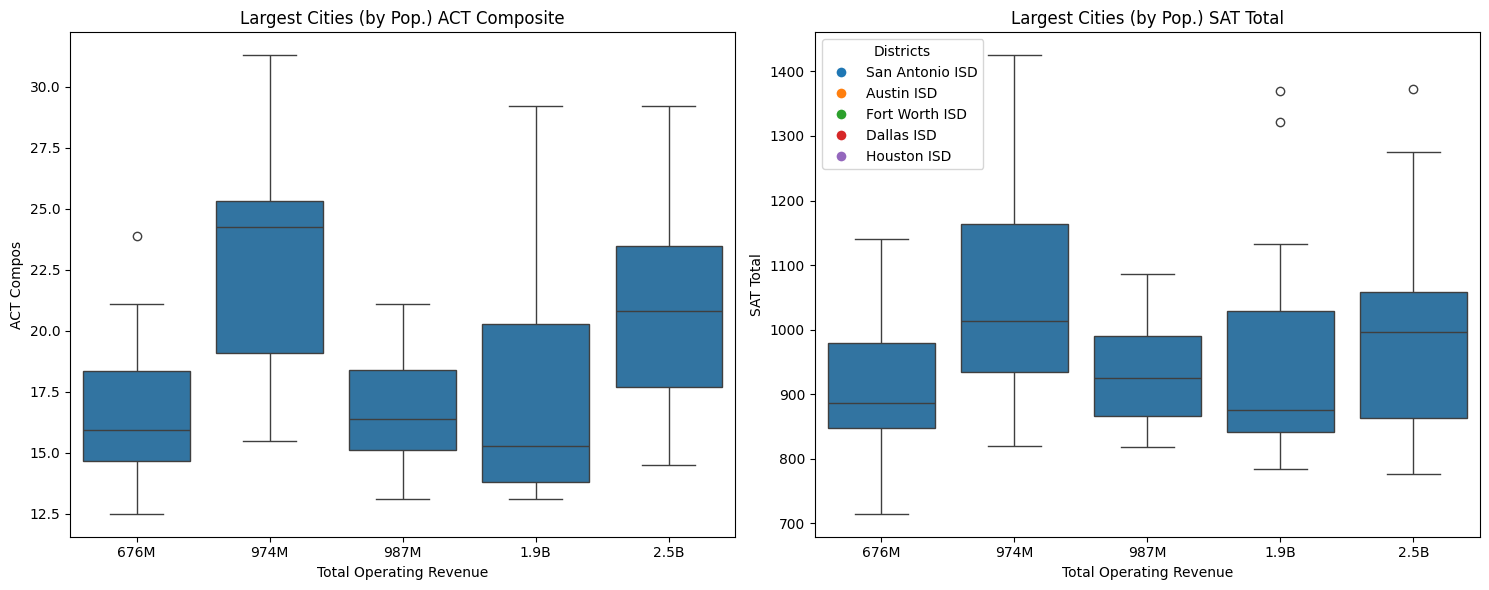

In [54]:
#box plot of sat and sat scores by largest districts
largest_sample = score_finance_complete.loc[(score_finance_complete["District Name"] == "dallas isd") | (score_finance_complete["District Name"] == "fort worth isd") | (score_finance_complete["District Name"] == "houston isd") |
                            (score_finance_complete["District Name"] == "san antonio isd") | (score_finance_complete["District Name"] == "austin isd")]["Total Operating Revenue"]

x = [0,1,2,3,4]
labels = ["676M", "974M", "987M", "1.9B", "2.5B"]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.boxplot(data=score_finance_complete, x=largest_sample, y="ACT Compos", ax=axes[0])
axes[0].set_title("Largest Cities (by Pop.) ACT Composite")
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)

sns.boxplot(data=score_finance_complete, x=largest_sample, y="SAT Total", ax=axes[1])
axes[1].set_title("Largest Cities (by Pop.) SAT Total")
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)

legend_labels = ["San Antonio ISD", "Austin ISD", "Fort Worth ISD", "Dallas ISD", "Houston ISD"]
legend_colors = sns.color_palette()

# Create a legend with custom labels and colors
legend = plt.legend(title="Districts", labels=legend_labels, handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8) for color in legend_colors
], loc="upper left")

# Set the legend title color to match the boxplot colors
legend.get_title().set_color('black')

# Adjust layout to prevent overlap
plt.tight_layout()

plt.savefig("images/ACT-SAT-Boxplots.png")

plt.show()

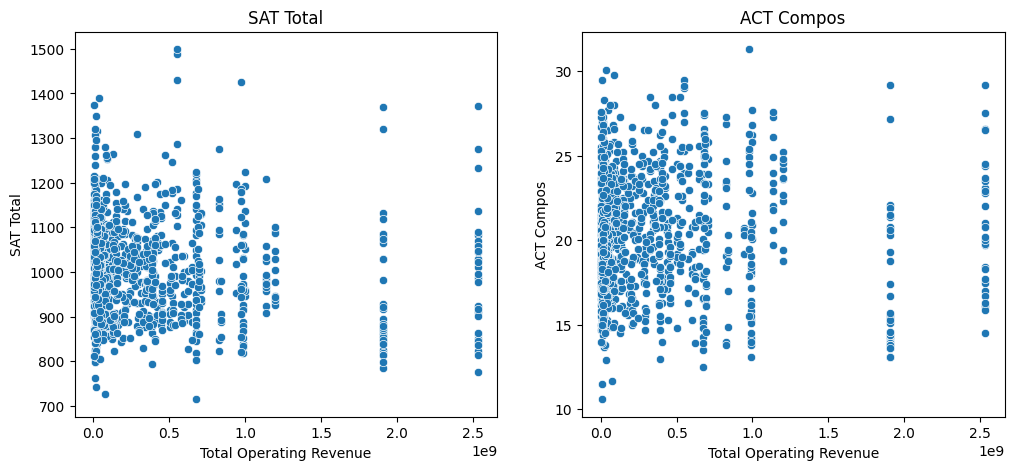

In [55]:
#sat and act scatter plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for SAT Total
sns.scatterplot(data=score_finance_complete, x="Total Operating Revenue", y="SAT Total", ax=axes[0])
axes[0].set_title('SAT Total')

# Scatter plot for ACT Compos
sns.scatterplot(data=score_finance_complete, x="Total Operating Revenue", y="ACT Compos", ax=axes[1])
axes[1].set_title('ACT Compos')

plt.savefig("images/ACT-SAT-scatter.png")

In [56]:
#correlation for Operating budget and act
correlation = st.pearsonr(score_finance_complete["Total Operating Revenue"], score_finance_complete["ACT Compos"])
print(f"The correlation between Total Operating Revenue and ACT Composite scores is {round(correlation[0],2)}")

#correclations for operating budgets and sat\
correlation = st.pearsonr(score_finance_complete["Total Operating Revenue"], score_finance_complete["SAT Total"])
print(f"The correlation between Total Operating Revenue and SAT Total scores is {round(correlation[0],2)}")

The correlation between Total Operating Revenue and ACT Composite scores is -0.03
The correlation between Total Operating Revenue and SAT Total scores is -0.09


Text(0.5, 1.0, 'ACT Compos')

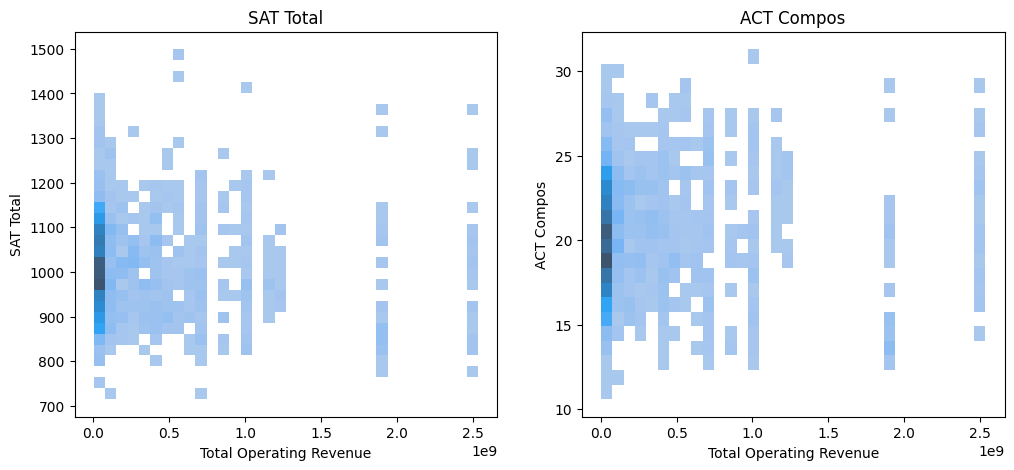

In [57]:
#histoplots for act and sat
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Scatter plot for SAT Total
sns.histplot(data=score_finance_complete, x="Total Operating Revenue", y="SAT Total", ax=axes[0])
axes[0].set_title('SAT Total')

# Scatter plot for ACT Compos
sns.histplot(data=score_finance_complete, x="Total Operating Revenue", y="ACT Compos", ax=axes[1])
axes[1].set_title('ACT Compos')